# **Superstore Sales Analysis** (проектный анализ данных розничной сети)

---

### Постановка задачи:

**Бизнес-контекст:** 
Анализ данных сети супермаркетов SuperStore за 2015-2018 годы для выявления ключевых паттернов продаж и формирования рекомендаций по оптимизации бизнеса.

**Цели анализа:**
- выявить ключевые драйверы роста продаж;
- проанализировать эффективность по категориям товаров и регионам;
- определить сезонные паттерны и тренды;
- сформулировать рекомендации для бизнеса;

**Ожидаемые результаты:**
- дашборд с ключевыми метриками;
- презентация с инсайтами;
- отчет с рекомендациями;

---

### Технологический стек:

| Компонент | Технологии |
|-----------|------------|
| **Анализ** | Pandas, NumPy |
| **Визуализация** | Matplotlib, Seaborn |
| **Дашборд** | Power BI |

---

### Структура проекта:

1. Загрузка данных;
2. Общая информация;
3. Обработка пропусков;
4. Приведение типов данных;
5. Разведочный анализ (EDA);
6. Бизнес-анализ;
7. Углубленный анализ;
8. Заключение;



---






## 1. Загрузка данных

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
sales_data = pd.read_csv('superstore_sales.csv')

## 2. Общая информация

In [476]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [477]:
sales_data.shape

(9800, 18)

In [478]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**(cразу видим 11 пропусков в столбце Postal Code...)**

In [479]:
sales_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [480]:
sum(sales_data.duplicated())

0

In [481]:
sales_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [482]:
sales_data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

## 3. Обработка пропусков

In [483]:
sales_data[sales_data['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [484]:
null_analysis = sales_data[sales_data['City']=='Burlington'][['City', 'Postal Code', 'Region', 'State']]
null_analysis

,City,Postal Code,Region,State
683,Burlington,27217.0,South,North Carolina
684,Burlington,27217.0,South,North Carolina
1008,Burlington,52601.0,Central,Iowa
1038,Burlington,27217.0,South,North Carolina
1039,Burlington,27217.0,South,North Carolina
1393,Burlington,27217.0,South,North Carolina
2234,Burlington,NaN,East,Vermont
2928,Burlington,27217.0,South,North Carolina
5065,Burlington,27217.0,South,North Carolina
5066,Burlington,27217.0,South,North Carolina


**Наблюдение:**
- Обнаружены пропуски только для Burlington в регионе East, это Burlington, Vermont, зададим ему почтовый индекс (Postal Code) 05401.0;
- Другие Burlington (в других регионах) имеют корректные индексы;

In [485]:
null_analysis['Region'].value_counts()

Region
South      11
East       11
Central     3
Name: count, dtype: int64

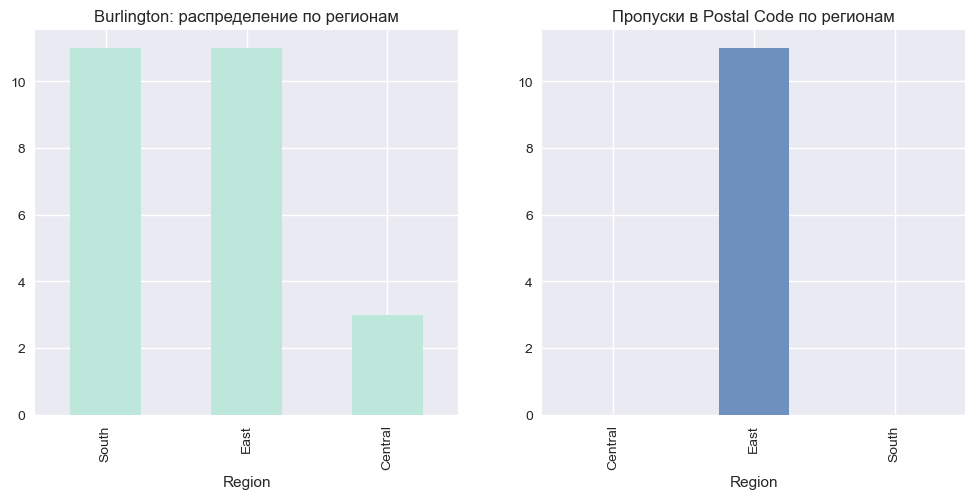

In [486]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

null_analysis['Region'].value_counts().plot(kind='bar', ax=ax[0], cmap='icefire', title='Burlington: распределение по регионам')

missings = null_analysis.groupby('Region')['Postal Code'].apply(lambda x: x.isnull().sum())
missings.plot(kind='bar', ax=ax[1], title='Пропуски в Postal Code по регионам')
plt.show()

In [487]:
vermont_pc = '05401.0'

# маска для точного таргетирования пропусков
mask = (sales_data['City'] == 'Burlington') & (sales_data['Region'] == 'East') & (sales_data['Postal Code'].isnull())

rows_fixed = mask.sum()
sales_data['Postal Code'] = sales_data['Postal Code'].astype(str)
sales_data.loc[mask, 'Postal Code'] = vermont_pc

In [488]:
null_analysis_2 = sales_data[sales_data['City']=='Burlington'][['City', 'Postal Code', 'Region', 'State']]
null_analysis_2

,City,Postal Code,Region,State
683,Burlington,27217.0,South,North Carolina
684,Burlington,27217.0,South,North Carolina
1008,Burlington,52601.0,Central,Iowa
1038,Burlington,27217.0,South,North Carolina
1039,Burlington,27217.0,South,North Carolina
1393,Burlington,27217.0,South,North Carolina
2234,Burlington,05401.0,East,Vermont
2928,Burlington,27217.0,South,North Carolina
5065,Burlington,27217.0,South,North Carolina
5066,Burlington,27217.0,South,North Carolina


**Результаты анализа:**

| Метрика | До обработки | После обработки |
|---------|-------------|-----------------|
| Пропусков в Burlington | 11 | 0 |
| Городов с пропусками | 1 | 0 |
| Целостность данных | 99.8% | 100% |

**Бизнес-ценность:** Сохранены данные о продажах в Burlington, VT для корректного географического анализа.

## 4. Приведение типов данных

In [489]:
sales_data[['Order Date', 'Ship Date']].dtypes

Order Date    object
Ship Date     object
dtype: object

**Преобразуем даты:**
- исходный формат: 'DD/MM/YYYY' (европейский);
- преобразуем в datetime для временного анализа;
- проверим логичность дат (Ship Date не может быть раньше Order Date);

In [490]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y', errors='coerce')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [491]:
sales_data[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [492]:
date_nulls = sales_data[['Order Date', 'Ship Date']].isnull().sum()
date_nulls

Order Date    0
Ship Date     0
dtype: int64

In [493]:
date_anomalies = sales_data[sales_data['Ship Date'] < sales_data['Order Date']]
print(f'Найдено аномалий в датах (Ship Date < Order Date): {len(date_anomalies)}')
print(f'Временной диапазон данных: {(sales_data['Order Date'].max() - sales_data['Order Date'].min()).days}')

Найдено аномалий в датах (Ship Date < Order Date): 0
Временной диапазон данных: 1457


In [494]:
sales_data[['Order Date', 'Ship Date']].sample(10)

,Order Date,Ship Date
4399,2017-03-17,2017-03-17
6540,2018-11-16,2018-11-19
7630,2015-03-30,2015-04-01
4222,2018-06-11,2018-06-13
4278,2017-04-16,2017-04-20
8124,2018-09-07,2018-09-12
9379,2015-12-23,2015-12-27
3241,2017-02-01,2017-02-03
1409,2017-09-25,2017-09-30
315,2015-08-09,2015-08-16


## 5. EDA (разведочный анализ)

**Проанализируем распределение продаж:**
- гистограмма — общее распределение значений;
- боксплот — визуализация выбросов;
- категории — сравнение эффективности по товарным группам;
- регионы — географическое распределение выручки;

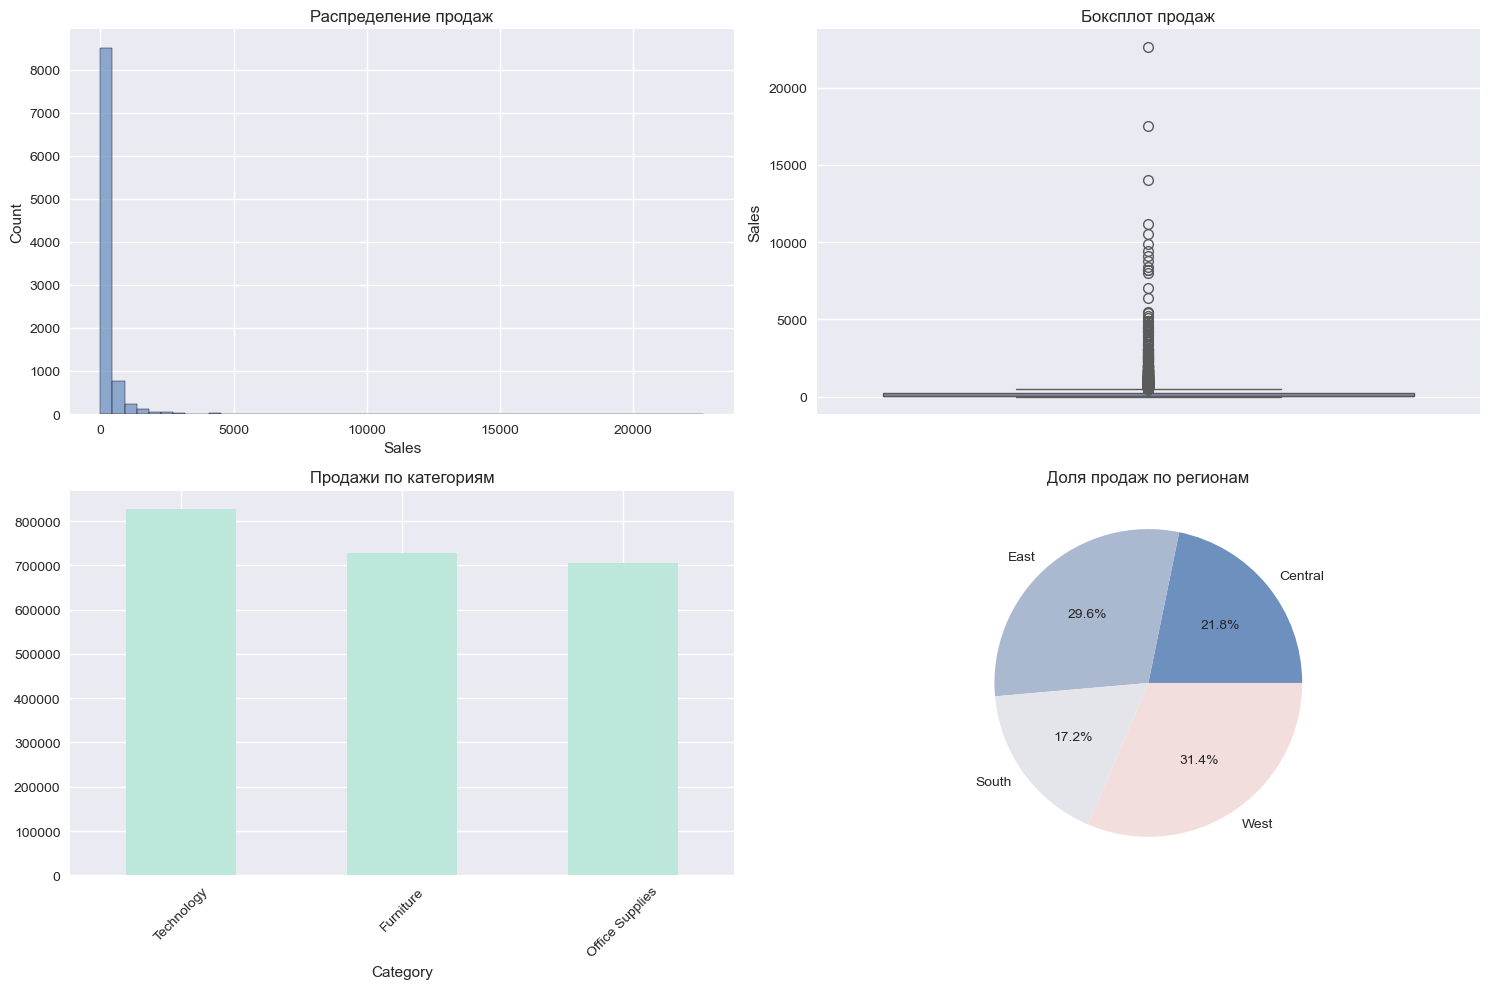

In [495]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(sales_data['Sales'], bins=50)
plt.title('Распределение продаж')
plt.xlabel('Sales')

plt.subplot(2, 2, 2)
sns.boxplot(y=sales_data['Sales'])
plt.title('Боксплот продаж')

plt.subplot(2, 2, 3)
top_categories = sales_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', cmap='icefire')
plt.title('Продажи по категориям')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
region_sales = sales_data.groupby('Region')['Sales'].sum()
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Доля продаж по регионам')

plt.tight_layout()
plt.show()

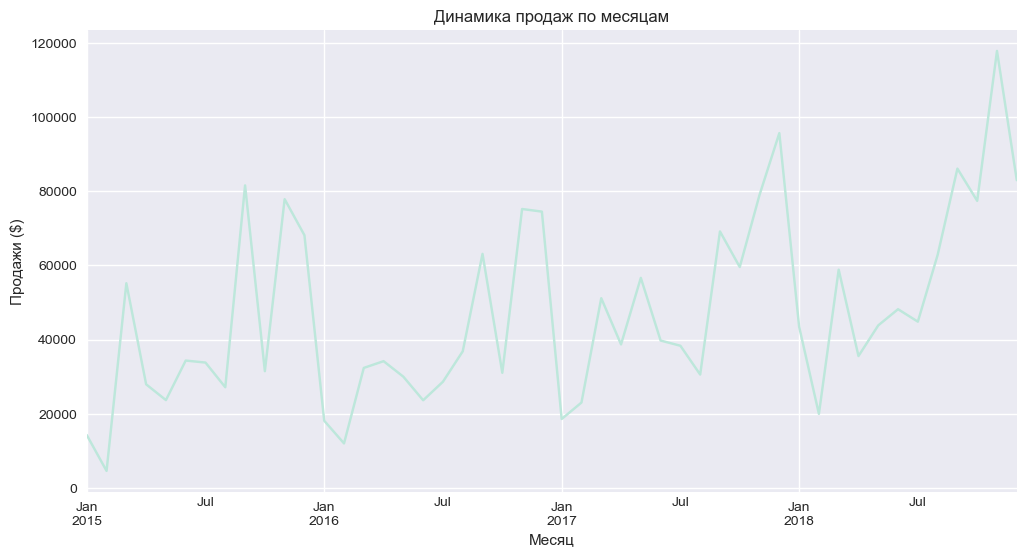

In [496]:
sales_data['Order_Year'] = sales_data['Order Date'].dt.year
sales_data['Order_Month'] = sales_data['Order Date'].dt.month
sales_data['Order_DayOfWeek'] = sales_data['Order Date'].dt.dayofweek

monthly_sales = sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', cmap='icefire', title='Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продажи ($)')
plt.grid(True)
plt.show()

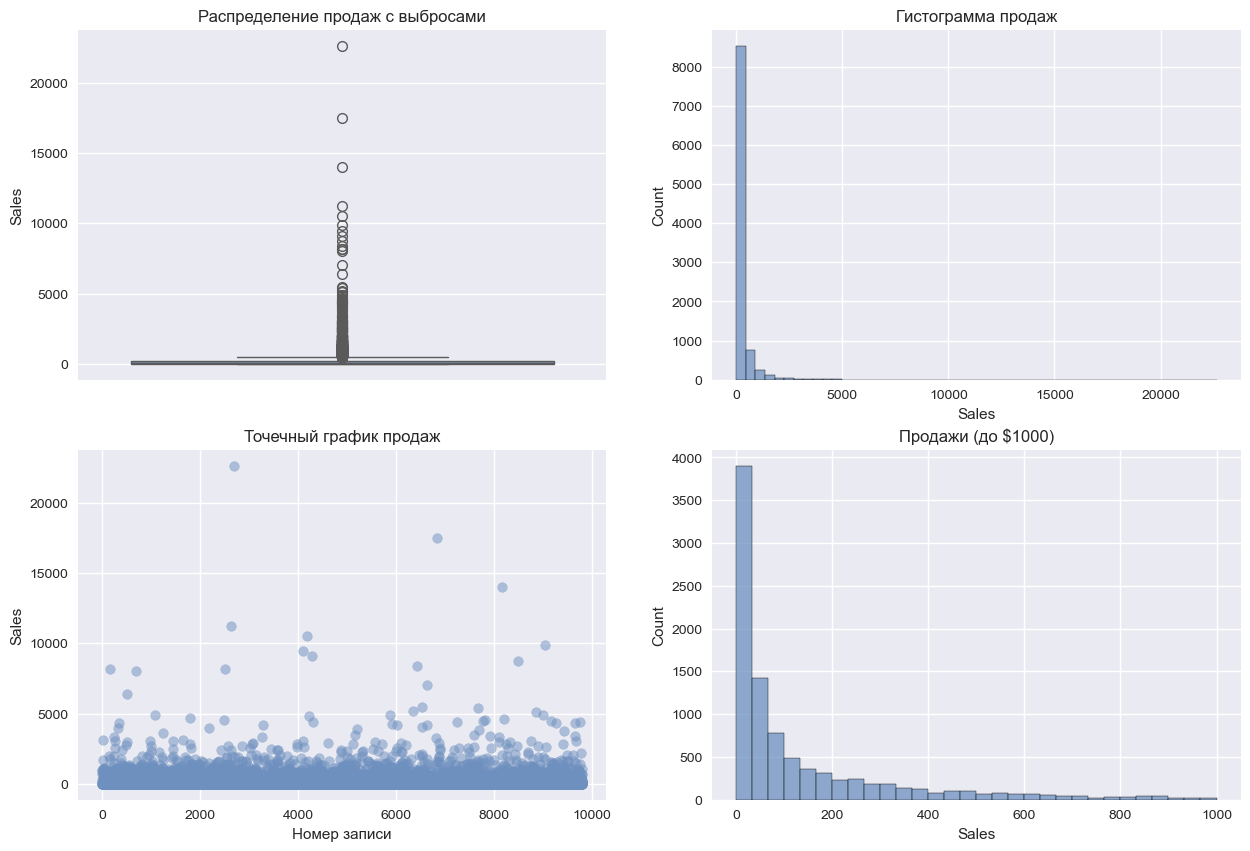

In [497]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=sales_data, y='Sales', ax=axes[0,0])
axes[0,0].set_title('Распределение продаж с выбросами')

sns.histplot(sales_data['Sales'], bins=50, ax=axes[0,1])
axes[0,1].set_title('Гистограмма продаж')
axes[0,1].set_xlabel('Sales')

axes[1,0].scatter(range(len(sales_data)), sales_data['Sales'], alpha=0.5)
axes[1,0].set_title('Точечный график продаж')
axes[1,0].set_xlabel('Номер записи')
axes[1,0].set_ylabel('Sales')

sns.histplot(sales_data[sales_data['Sales'] < 1000]['Sales'], bins=30, ax=axes[1,1])
axes[1,1].set_title('Продажи (до $1000)')
axes[1,1].set_xlabel('Sales')

plt.show()

**Обработаем выбросы:**
- посчитаем квартили;
- верхняя граница: Q3 + 1.5 * IQR (квартильный размах);
- выбросы составляют некоторый процент данных — это реальные крупные заказы;
- не удаляем выбросы, а помечаем в новом столбце (sales_data['Is_Outlier']) для отдельного анализа;

In [506]:
sales_stats = sales_data['Sales'].describe()
print(f'Статистика по продажам: \n{sales_stats}')

Статистика по продажам: 
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


In [510]:
Q1 = sales_data['Sales'].quantile(0.25)
Q3 = sales_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

l_bound = Q1 - 1.5 * IQR
u_bound = Q3 + 1.5 * IQR

print(f'Q1 (25-й перцентиль): {Q1:.2f}$')
print(f'Q3 (75-й перцентиль): {Q3:.2f}$')
print(f'IQR: {IQR:.2f}$')
print(f'Нижняя граница: {l_bound:.2f}$')
print(f'Верхняя граница: {u_bound:.2f}$')

outliers = sales_data[(sales_data['Sales'] < l_bound) | (sales_data['Sales'] > u_bound)]
print(f'\nОбнаружено выбросов: {len(outliers)} ({len(outliers)/len(sales_data)*100:.2f}% данных)')

top_outliers = outliers.nlargest(10, 'Sales')[['Product Name', 'Sales', 'Category', 'Region']]
print('\nТоп-10 самых крупных выбросов:')
top_outliers

Q1 (25-й перцентиль): 17.25$
Q3 (75-й перцентиль): 210.61$
IQR: 193.36$
Нижняя граница: -272.79$
Верхняя граница: 500.64$

Обнаружено выбросов: 1145 (11.68% данных)

Топ-10 самых крупных выбросов:


,Product Name,Sales,Category,Region
2697,Cisco TelePresence System EX90 Videoconferenci...,22638.480,Technology,South
6826,Canon imageCLASS 2200 Advanced Copier,17499.950,Technology,Central
8153,Canon imageCLASS 2200 Advanced Copier,13999.960,Technology,West
2623,Canon imageCLASS 2200 Advanced Copier,11199.968,Technology,East
4190,Canon imageCLASS 2200 Advanced Copier,10499.970,Technology,East
9039,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,Office Supplies,Central
4098,Ibico EPK-21 Electric Binding System,9449.950,Office Supplies,Central
4277,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,Technology,East
8488,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,Technology,South
6425,Canon imageCLASS 2200 Advanced Copier,8399.976,Technology,East


In [513]:
outliers_by_category = outliers.groupby('Category')['Sales'].agg(['count', 'sum', 'mean'])
print('\nВыбросы по категориям товаров:')
print(outliers_by_category)

outlier_products = outliers.groupby('Product Name')['Sales'].agg(['count', 'sum']).nlargest(10, 'sum')
print('\nТоп-10 товаров среди выбросов:')
print(outlier_products)

outliers = outliers.copy()
outliers.loc[:, 'Order Date'] = pd.to_datetime(outliers['Order Date'])
print(f'\nПериод выбросов: с {outliers['Order Date'].min()} по {outliers['Order Date'].max()}')


Выбросы по категориям товаров:
                 count          sum         mean
Category                                        
Furniture          459  485288.1409  1057.272638
Office Supplies    292  367443.5840  1258.368438
Technology         394  602043.6880  1528.029665

Топ-10 товаров среди выбросов:
                                                    count        sum
Product Name                                                        
Canon imageCLASS 2200 Advanced Copier                   5  61599.824
Fellowes PB500 Electric Punch Plastic Comb Bind...     10  27453.384
Cisco TelePresence System EX90 Videoconferencin...      1  22638.480
HON 5400 Series Task Chairs for Big and Tall            8  21870.576
GBC DocuBind TL300 Electric Binding System             11  19823.479
Hewlett Packard LaserJet 3310 Copier                    8  18839.686
GBC Ibimaster 500 Manual ProClick Binding System        8  18567.912
HP Designjet T520 Inkjet Large Format Printer -...      3  18374.895
G

In [517]:
outliers_by_year = outliers.groupby(outliers['Order Date'].dt.year)['Sales'].agg(['count', 'sum', 'mean'])
print('\nВыбросы по годам:')
print(outliers_by_year)

outliers_by_month = outliers.groupby(outliers['Order Date'].dt.month)['Sales'].agg(['count', 'sum'])
print('\nВыбросы по месяцам:')
print(outliers_by_month)


Выбросы по годам:
            count          sum         mean
Order Date                                 
2015          250  324128.5680  1296.514272
2016          256  289944.1594  1132.594373
2017          288  388346.8167  1348.426447
2018          351  452355.8688  1288.763159

Выбросы по месяцам:
            count          sum
Order Date                    
1              40   63013.8266
2              25   31801.3810
3              82  138558.7324
4              68   83757.3325
5              78   97006.8973
6              78   86805.6045
7              82   86210.2080
8              88  101599.6245
9             152  194198.0074
10             87  133988.9345
11            194  232444.8970
12            171  205389.9672


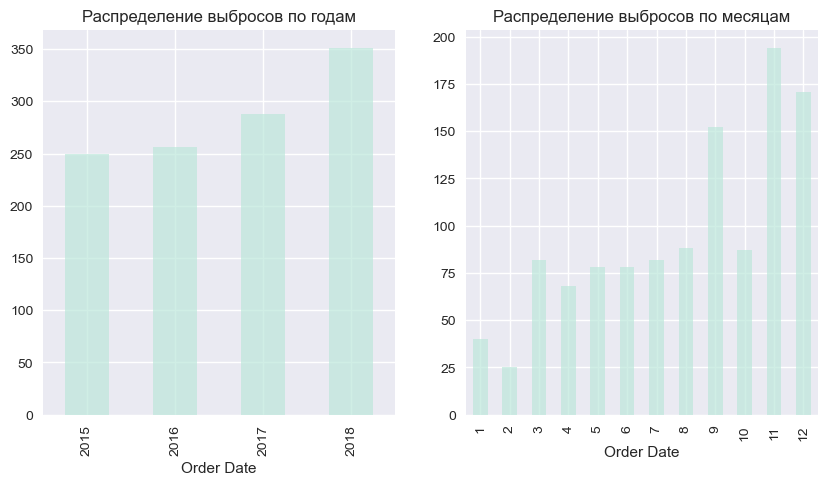

In [518]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

outliers_by_year['count'].plot(kind='bar', cmap='icefire', alpha=0.7, ax=ax[0])
ax[0].set_title('Распределение выбросов по годам')

outliers_by_month['count'].plot(kind='bar', cmap='icefire', alpha=0.7, ax=ax[1])
ax[1].set_title('Распределение выбросов по месяцам')
plt.show()

**Наблюдение:**
- выбросы распределены равномерно по всему периоду (2015-2018);
- нет концентрации в определенные месяцы/годы;
- подтверждает гипотезу о реальных крупных заказах, а не ошибках данных;

In [522]:
sales_data['Is_Outlier'] = (sales_data['Sales'] > upper_bound).astype(int)
sales_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_DayOfWeek,Is_Outlier
5433,5434,CA-2018-129707,2018-04-25,2018-04-29,Standard Class,LH-16750,Larry Hughes,Consumer,United States,Chandler,...,West,OFF-AR-10000246,Office Supplies,Art,Newell 318,8.896,2018,4,2,0
7252,7253,CA-2017-152457,2017-09-12,2017-09-18,Standard Class,SC-20695,Steve Chapman,Corporate,United States,Roseville,...,Central,OFF-PA-10003790,Office Supplies,Paper,Xerox 1991,68.520,2017,9,1,0
2646,2647,CA-2015-131002,2015-09-07,2015-09-12,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Tulsa,...,Central,OFF-BI-10000948,Office Supplies,Binders,"GBC Laser Imprintable Binding System Covers, D...",42.810,2015,9,0,0
4740,4741,CA-2018-164364,2018-11-12,2018-11-16,Standard Class,CS-12355,Christine Sundaresam,Consumer,United States,Seattle,...,West,OFF-LA-10004853,Office Supplies,Labels,Avery 483,9.960,2018,11,0,0
5694,5695,US-2016-138093,2016-12-10,2016-12-16,Standard Class,KM-16225,Kalyca Meade,Corporate,United States,Baltimore,...,East,FUR-CH-10000785,Furniture,Chairs,Global Ergonomic Managers Chair,542.940,2016,12,5,1


## 6. Бизнес-анализ

**Определим ключевые бизнес-метрики:**
- общая выручка — интегральный показатель эффективности;
- средний чек — показатель ценности корзины;
- ABC-анализ — приоритизация товарного ассортимента;
- и др.

In [530]:
print(f'Общий объем продаж: ${sales_data['Sales'].sum():.2f}')
print(f'Средний чек: ${sales_data['Sales'].mean():.2f}')
print(f'Медианный чек: ${sales_data['Sales'].median():.2f}')
print(f'Количество заказов: {len(sales_data)}')
print(f'Уникальных клиентов: {sales_data['Customer ID'].nunique()}')
print(f'Уникальных товаров: {sales_data['Product ID'].nunique()}')

Общий объем продаж: $2261536.78
Средний чек: $230.77
Медианный чек: $54.49
Количество заказов: 9800
Уникальных клиентов: 793
Уникальных товаров: 1861


In [539]:
category_analysis = sales_data.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)

category_analysis.columns = ['Total Sales', 'Average Sales', 'Orders Count', 'Unique Customers']
print('Анализ по категориям товаров:')
category_analysis

Анализ по категориям:


,Total Sales,Average Sales,Orders Count,Unique Customers
Category,,,,
Furniture,728658.58,350.65,2078,705
Office Supplies,705422.33,119.38,5909,787
Technology,827455.87,456.40,1813,684


In [540]:
customer_analysis = sales_data.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)

customer_analysis.columns = ['Total Sales', 'Average Sales', 'Orders Count', 'Unique Customers']
print('Анализ по сегментам клиентов:')
customer_analysis

Анализ по сегментам клиентов:


,Total Sales,Average Sales,Orders Count,Unique Customers
Segment,,,,
Consumer,1148060.53,225.07,5101,409
Corporate,688494.07,233.15,2953,236
Home Office,424982.18,243.40,1746,148


In [546]:
top_10_cities = sales_data.groupby('City')['Sales'].sum().nlargest(10)
print(f'Топ-10 городов по продажам:\n{top_10_cities}')

Топ-10 городов по продажам:
City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64


## 7. Углубленный анализ

**Проведем углубленный анализ:**
1. анализ корреляции между переменными;
2. выявление сезонных паттернов на агрегированных данных; 
3. ABC-анализ;

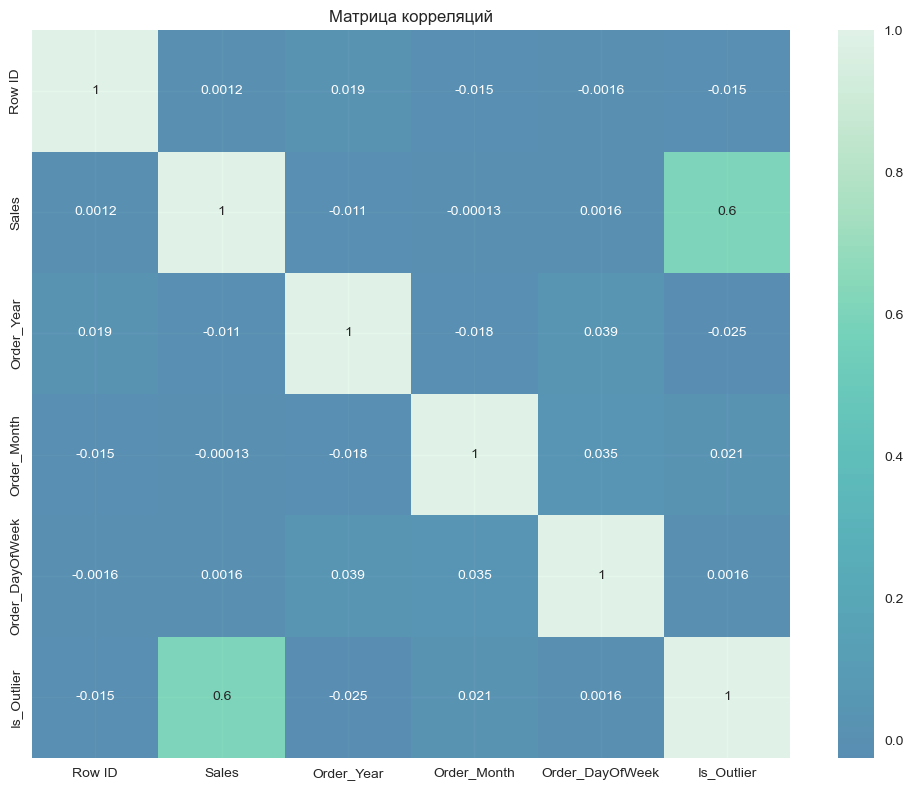

In [553]:
# числовые признаки для корреляции
numeric_data = sales_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='mako', alpha=0.8, center=0)
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

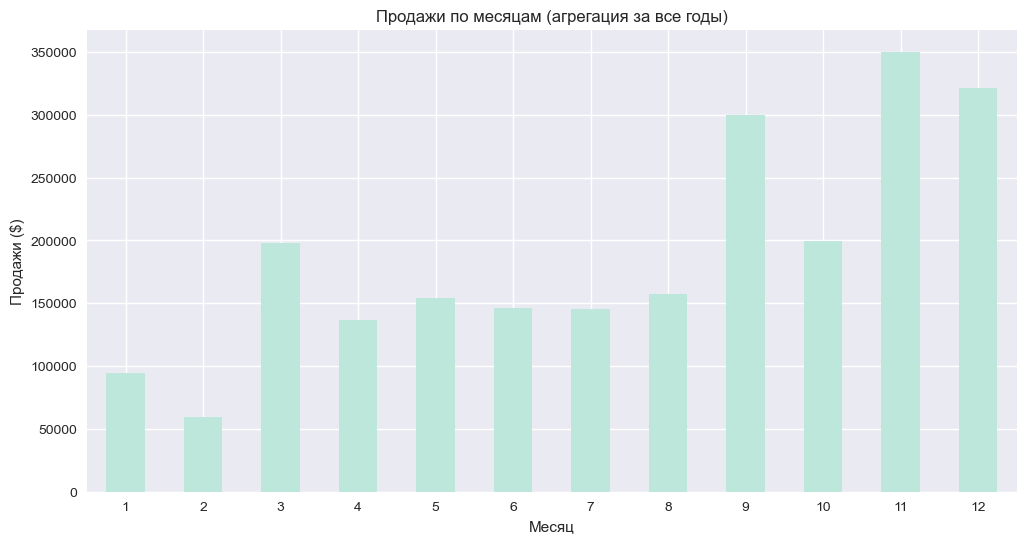

In [554]:
monthly_trend = sales_data.groupby('Order_Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='bar', cmap='icefire')
plt.title('Продажи по месяцам (агрегация за все годы)')
plt.xlabel('Месяц')
plt.ylabel('Продажи ($)')
plt.xticks(rotation=0)
plt.show()

In [556]:
prod_sales = sales_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
prod_sales_cs = product_sales.cumsum() / product_sales.sum() * 100

prod_a = prod_sales_cs[prod_sales_cs <= 80].index
prod_b = prod_sales_cs[(prod_sales_cs > 80) & (prod_sales_cs <= 95)].index
prod_c = prod_sales_cs[prod_sales_cs > 95].index

print(f'A: {len(prod_a)} товаров (80% выручки)')
print(f'B: {len(prod_b)} товаров (15% выручки)')
print(f'C: {len(prod_c)} товаров (5% выручки)')

A: 417 товаров (80% выручки)
B: 489 товаров (15% выручки)
C: 943 товаров (5% выручки)


**ABC-анализ (практическое применение):**
- Категория A (20% товаров = 80% выручки) — фокус на управлении ассортиментом;
- Категория B (15% товаров = 15% выручки) — стабильный доход;
- Категория C (65% товаров = 5% выручки) — оптимизация складских запасов;

## 8. Заключение

**Подготавливаем данные для создания дашборда:**
- агрегируем данные по ключевым измерениям;
- уровень детализации — Год-Месяц-Категория-Регион;
- данные готовы для визуализации в BI-инструменте;
- метрики — Sales (сумма), Customer ID (количество уникальных);

In [151]:
dashboard_data = sales_data.groupby(['Order_Year', 'Order_Month', 'Category', 'Region']).agg({
    'Sales': 'sum',
    'Customer ID': 'nunique'
}).reset_index()

dashboard_data.to_csv('dashboard_superstore_sales.csv', index=False)